In [1]:
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv("framingham.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
##Let's check for null values

df.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
#Let's drop the null values

df.dropna(inplace = True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [6]:
#Let's check for duplicates
df.drop_duplicates()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [7]:
#Let's split the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop("TenYearCHD", axis = 1)
y = df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#Let's scale our data
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

### Logistic Regression

In [8]:
#Let's build a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

baseline_model = LogisticRegression(solver = "saga", random_state = 42)

#Fit our model and predict
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

In [9]:
#Let's create a confusion matrix
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

#conf_matrix = confusion_matrix(y_test, y_pred)
#conf_matrix

In [10]:
#plot_confusion_matrix(baseline_model, X_test, y_test);

In [11]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss

#Let's look at our evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred)) 
print("Recall:",recall_score(y_test, y_pred)) 
print("F1-Score: ", f1_score(y_test, y_pred))

Accuracy:  0.8479212253829321
Precision: 0.5789473684210527
Recall: 0.07746478873239436
F1-Score:  0.13664596273291924


### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "entropy")

#Fit our model and predict
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

In [18]:
#Let's look at our evaluation metrics
print("Accuracy: ", accuracy_score(y_test, dtc_pred))
print("Precision:",precision_score(y_test, dtc_pred))
print("Recall:",recall_score(y_test, dtc_pred)) 
print("F1-Score: ", f1_score(y_test, dtc_pred))


Accuracy:  0.7647702407002188
Precision: 0.2582781456953642
Recall: 0.2746478873239437
F1-Score:  0.2662116040955631


## Improving the models

We will now take an iterative approach for our models, to attempt to improve our evaluation metrics. We'll start with our decision tree model. 

We'll see how manipulating the **max_depth**, **min_samples_split**, and **min_samples_leaf** hyperparameters in our decision tree model will affect our evaluation metrics.

### max_depth

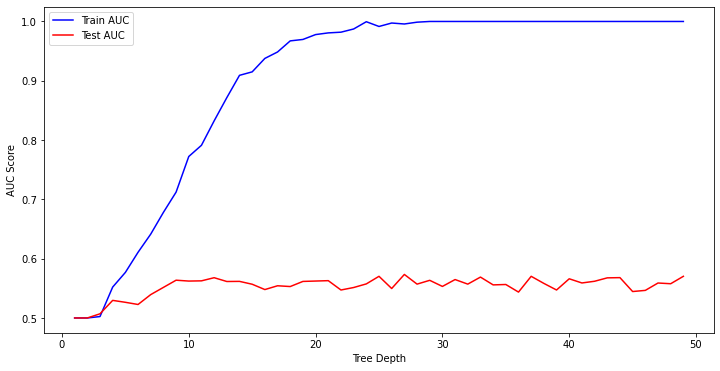

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Let's plot our ROC curve

max_depths = list(range(1,50))
train_results = []
test_results = []

for depth in max_depths:
    dtc2 = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    dtc2.fit(X_train, y_train)
    dtc_pred2 = dtc2.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, dtc_pred2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_dtc_pred = dtc2.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_dtc_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize = (12,6))
plt.plot(max_depths,train_results, "b", label = "Train AUC");
plt.plot(max_depths, test_results, "r", label = "Test AUC");
plt.ylabel("AUC Score");
plt.xlabel("Tree Depth");
plt.legend();

### min_samples_split

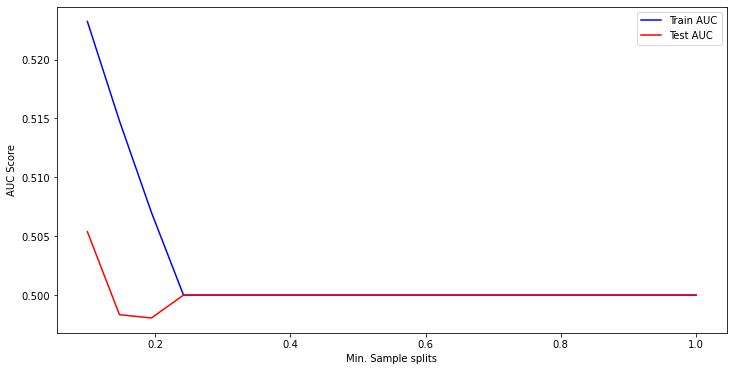

In [15]:
min_samples_splits = np.linspace(0.1, 1.0, 20)
train_results = []
test_results = []
for min_samples in min_samples_splits:
    dtc2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples)
    dtc2.fit(X_train, y_train)
    dtc_pred2 = dtc2.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, dtc_pred2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_dtc_pred = dtc2.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_dtc_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6));
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC');
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC');
plt.xlabel('Min. Sample splits');
plt.ylabel("AUC Score")
plt.legend();

### min_samples_leaf

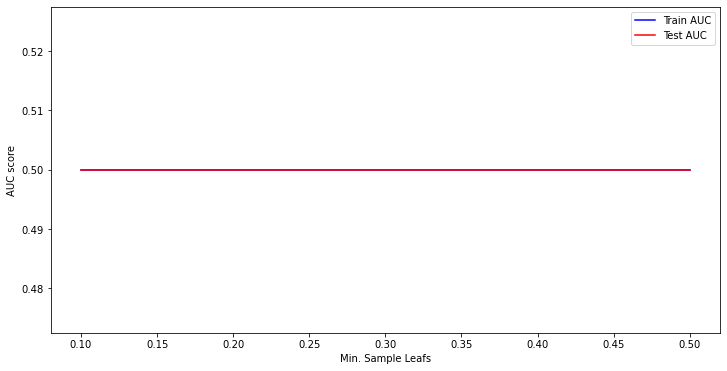

In [16]:

min_samples_leafs = np.linspace(0.1, .5, 30)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dtc2 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
    dtc2.fit(X_train, y_train)
    dtc_pred2 = dtc2.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, dtc_pred2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_dtc_pred = dtc2.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_dtc_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()